In [ ]:
'''


🎓 Student Psychology Tip (Why These Work)

Students click when titles:

    Ask a question
    Challenge a myth
    Feel like a game or battle



'''

# 1.. How to read csv data or how to load data  ! 

In [1]:
### lets import all the necessary packages !

In [1]:
import pandas as pd ## for reading data , data cleaning 
import numpy as np ## to do numerical computation eg what could be avg View on some utube channel ?
import seaborn as sns ## data viz
import matplotlib.pyplot as plt

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
'''

we are going to consider this data from Kaggle !
By the way , Kaggle is a community where u can find real world Datasets for your Project !

Just do simple sign-in & u can access this data !
or u can download this data via zip file as well that we have attched !

'''

In [ ]:
'''

Windows uses '\' as a file separator
Mac uses '/' as a file separator

& this makes file structure so confusing !
So to get rid of any issues , it is good idea to append raw string before file path..

It means file path will be to understood to Pandas as it is !

'''

In [ ]:
'''

lets read this UScomments.csv


'''

In [4]:
comments = pd.read_csv(r'R:\All_Datasets\1.. Youtube\Datasets/UScomments.csv' , on_bad_lines = "skip" )

C:\Users\shant\AppData\Local\Temp\ipykernel_30876\1998544802.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'R:\All_Datasets\1.. Youtube\Datasets/UScomments.csv' , on_bad_lines = "skip" )


In [ ]:
'''
error says that u have some corrupted rows in your data  , so lets skip those rows while reading data !
In pandas, on_bad_lines will help you to skip "corrupted rows" , so say on_bad_lines = "skip"


'''

In [ ]:
### above is a warning , u can ignore that ..

In [ ]:
'''

this is a data-frame (2-D data structure of Pandas) , ie have rows , cols


'''

In [131]:
comments

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
'''
So we have collected data 

Now, the moment you collect data, one thing is always true 👉
the data is raw, uncleaned, and messy..
And that’s completely normal — real-world data is never perfect.

Thats why u have clean this data so that u can make insights !



'''

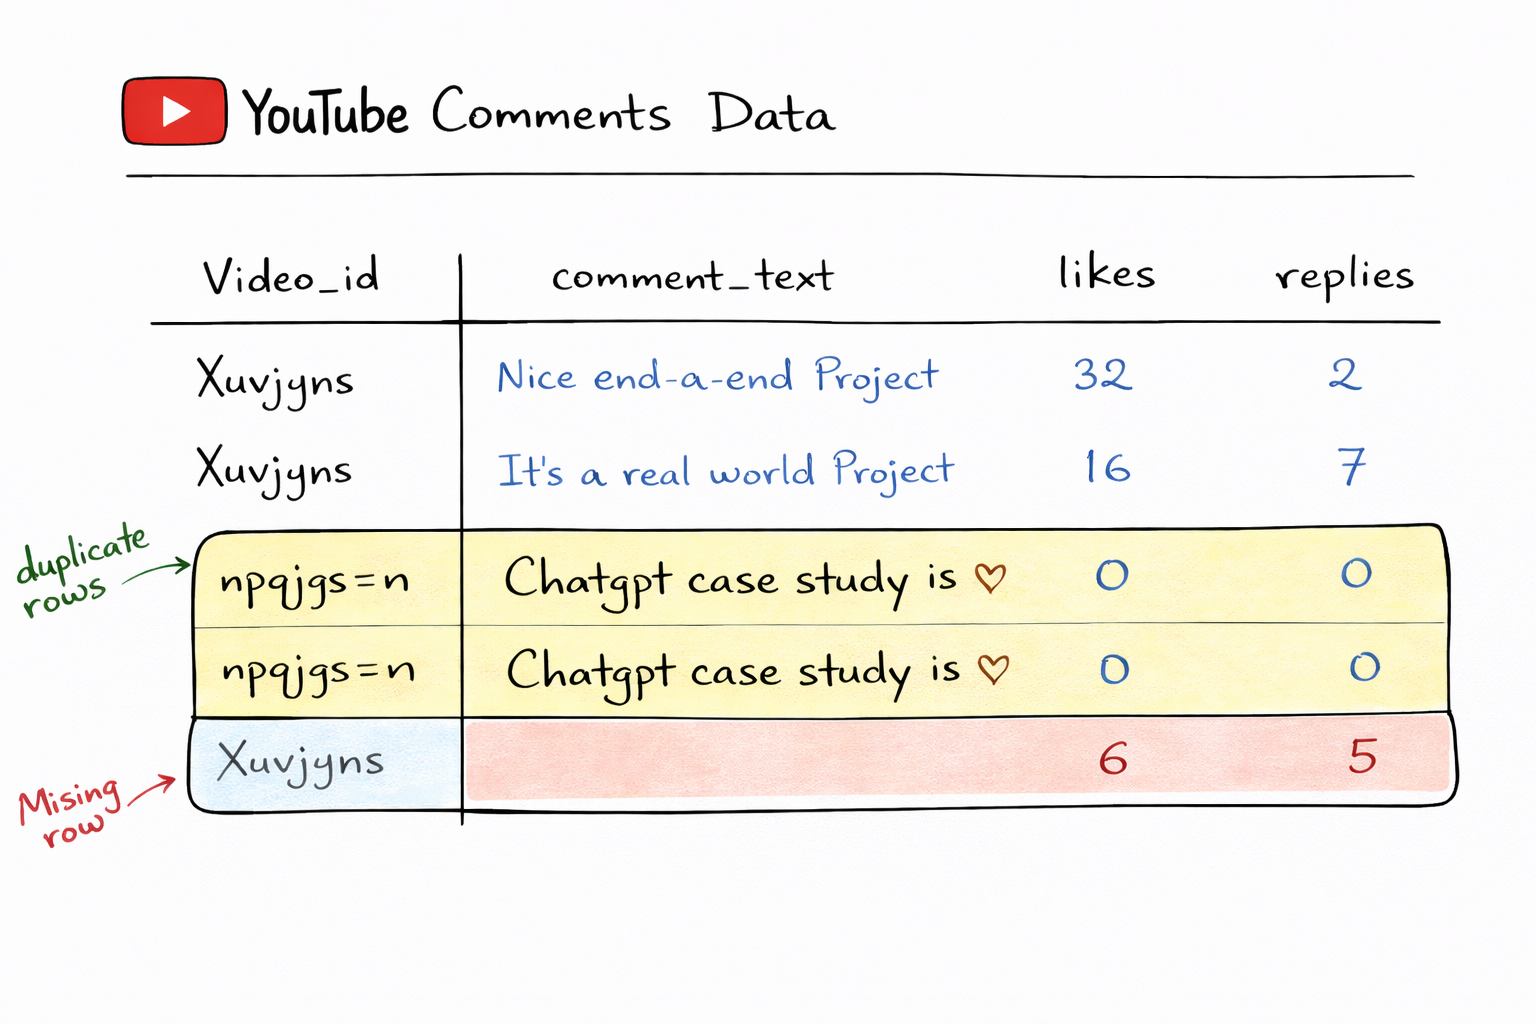

In [138]:
comments.duplicated() ## this will give us boolean series 

0         False
1         False
2         False
3         False
4         False
          ...  
691395     True
691396     True
691397     True
691398    False
691399     True
Length: 691400, dtype: bool

In [ ]:
comments[comments.duplicated(keep = False)]

## keep = False returns all rows which are duplicated !
## But it’s hard to visually confirm whether rows are truly identical

In [6]:
comments[comments.duplicated(keep=False)].sort_values("comment_text")

## u can sort duplicated rows so that identical records appear side-by-side,

video_id                                     comment_text likes  \
577043  xEqCt7GZo7M                                                      0   
597655  xEqCt7GZo7M                                                      0   
561617  uCVuyIQZ-lA   'Literally' 'like' my bestfriend\nCamila wut?🤔     0   
581888  uCVuyIQZ-lA   'Literally' 'like' my bestfriend\nCamila wut?🤔     0   
603266  uCVuyIQZ-lA   'Literally' 'like' my bestfriend\nCamila wut?🤔     0   
...             ...                                              ...   ...   
563768  CX4KuIBmnjI                                              NaN     0   
584612  CX4KuIBmnjI                                              NaN     0   
605039  CX4KuIBmnjI                                              NaN     0   
615625  5qlSfNVp3fU                                              NaN     0   
637282  5qlSfNVp3fU                                              NaN     0   

       replies  
577043       0  
597655       0  
561617       0  
581888       0  
603266       0  
...        ...  
563768       0  
584612       0  
605039       0  
615625       0  
637282       0  

[341926 rows x 4 columns]

In [8]:
### lets remove duplicated instances !

comments = comments.drop_duplicates()

In [9]:
comments.shape

(478707, 4)

In [143]:
## lets find out missing values in your data

comments.isnull().sum()

video_id         0
comment_text    16
likes            0
replies          0
dtype: int64

In [144]:
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace = True)

In [145]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
'''
Momentum :

Alright , we have successfully loaded Youtube data , now in the next session , we will analyse 
"How to Perform Sentiment Analysis" ?

Show img 

'''

# 2.. Perform Sentiment Analysis
    


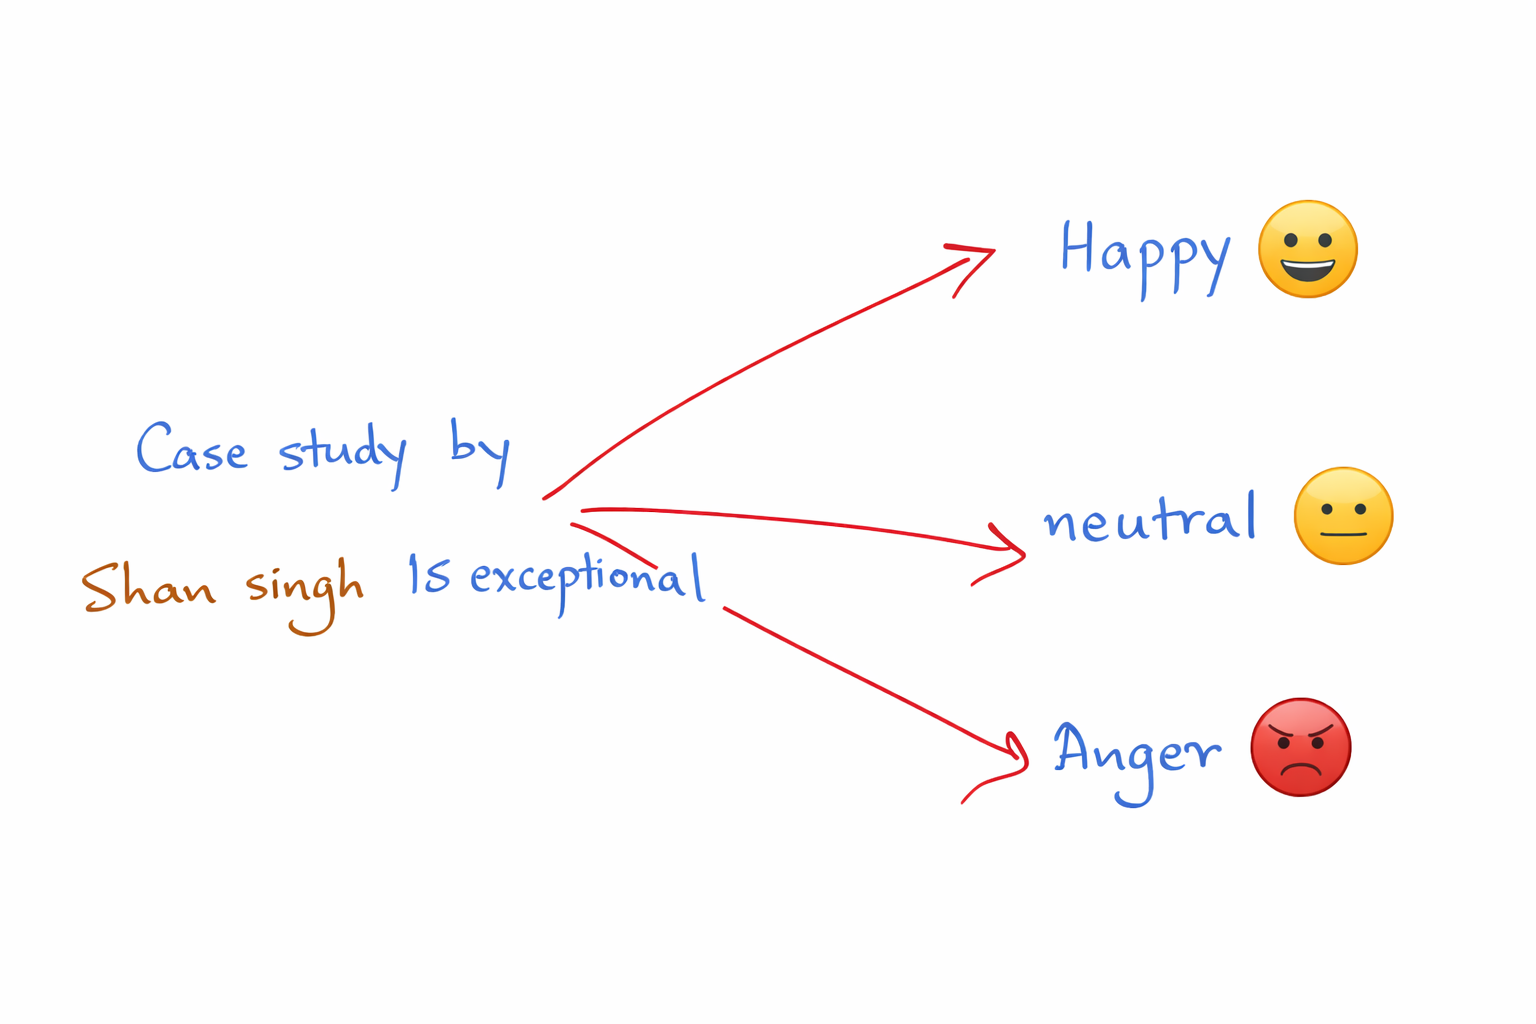

In [ ]:
'''

explain sentiment analysis via img 


Sentiment analysis in short is all about to classified user comment into Positive 😊, Neutral 😐, or Negative 😡 emotions. !
    
It assigns a sentiment score (polarity) that ranges from –1 to +1.
more it is close to -1 , ie more it is negative ( This is the worst movie ever)
more close to 0 means ,, it is neutral sentence ( This movie is Okay)
more it is +1 , more it is +ve ( This case study is amazing )


'''

In [86]:
'''

Now you might wonder —
how do we actually find sentiment scores for a given text?


So in short , there are two main approaches to do that :
I) u can use 1️⃣ Classic Data Analytics tools
II) u can use 2️⃣ Modern AI / NLP Models like BERT , DistilBERT to find sentiment scores 
    These models are Highly accurate but computationally heavy
    & you Requires more ML/NLP knowledge

Since this course is more about Data Analytics , so lets stick to Data Analytics tools like VADER !

NLTK VADER → Pre-trained sentiment analysis model..
    Pre-trained basically means it has already been trained from huge amounts of real-world text
    So as soon as u will give new text data to VADER , it will give u sentiment scores !
    
    & it Works pretty well on tweets, reviews, and comments.


'''

'\n\nSentiment analysis is all about sentiment scores which range between (-1,+1)\n\nTextBlob → Simple Python library (built on NLTK) for quick sentiment checks.\n\nGood for beginners and small projects.\n\nNLTK VADER (Valence Aware Dictionary and sEntiment Reasoner) → Pre-trained sentiment model.\n\nWorks well for short texts like tweets, reviews, and comments.\n\n\n'

In [ ]:
## whenever u have to work with text data , make sure nltk is installed

In [ ]:
!pip install nltk

In [7]:
import nltk
# nltk.download('vader_lexicon')

## download "vader_lexicon" , else you will have "Lookup Error"

In [ ]:
'''

VADER is a built-in list of words with sentiment scores.
& using that list , it will give total sentiment scores of user text 

'''

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
comments["comment_text"][0:10]

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [19]:
sia.polarity_scores("MY FAN . attendance")  # compound score = overall sentiment

{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.4648}

In [12]:
sia.polarity_scores("MY FAN . attendance")["compound"]

0.4648

In [13]:
# If u are interested How vader works internally , u can print its lexicon list which have sentiment scores attached !

sia.lexicon

# Each word haave some emntiment scores attached 

7502

In [ ]:
### now lets define a func which will classifiy utube comment into happy , nuetral or anger !

In [20]:
## mention insight later 


def analyze_comment_sentiment(comment):

    scores = sia.polarity_scores(comment)
    compound = scores["compound"]

    if compound > 0.05:
        label = "Positive 😊"
        insight = "The comment expresses positive emotion or approval."
        
    elif compound < -0.05:
        label = "Negative 😡"
        insight = "The comment shows dissatisfaction or negative emotion."
        
    else:
        label = "Neutral 😐"
        insight = "The comment is informational or emotionally neutral."

    return {
        "label": label,
        "score": round(compound, 3),
        "insight": insight
    }

In [21]:
analyze_comment_sentiment("MY FAN . attendance")

{'label': 'Positive 😊',
 'score': 0.465,
 'insight': 'The comment expresses positive emotion or approval.'}

In [ ]:
'''

so in this session , we have learnt about mood of Users, whether they happy , neutral or angry !

Momentum : 
Now in the next session ,  
we will perform Emojis analysis to understand Emotions of Users , like whether they are happy , unsatisfied !
'''

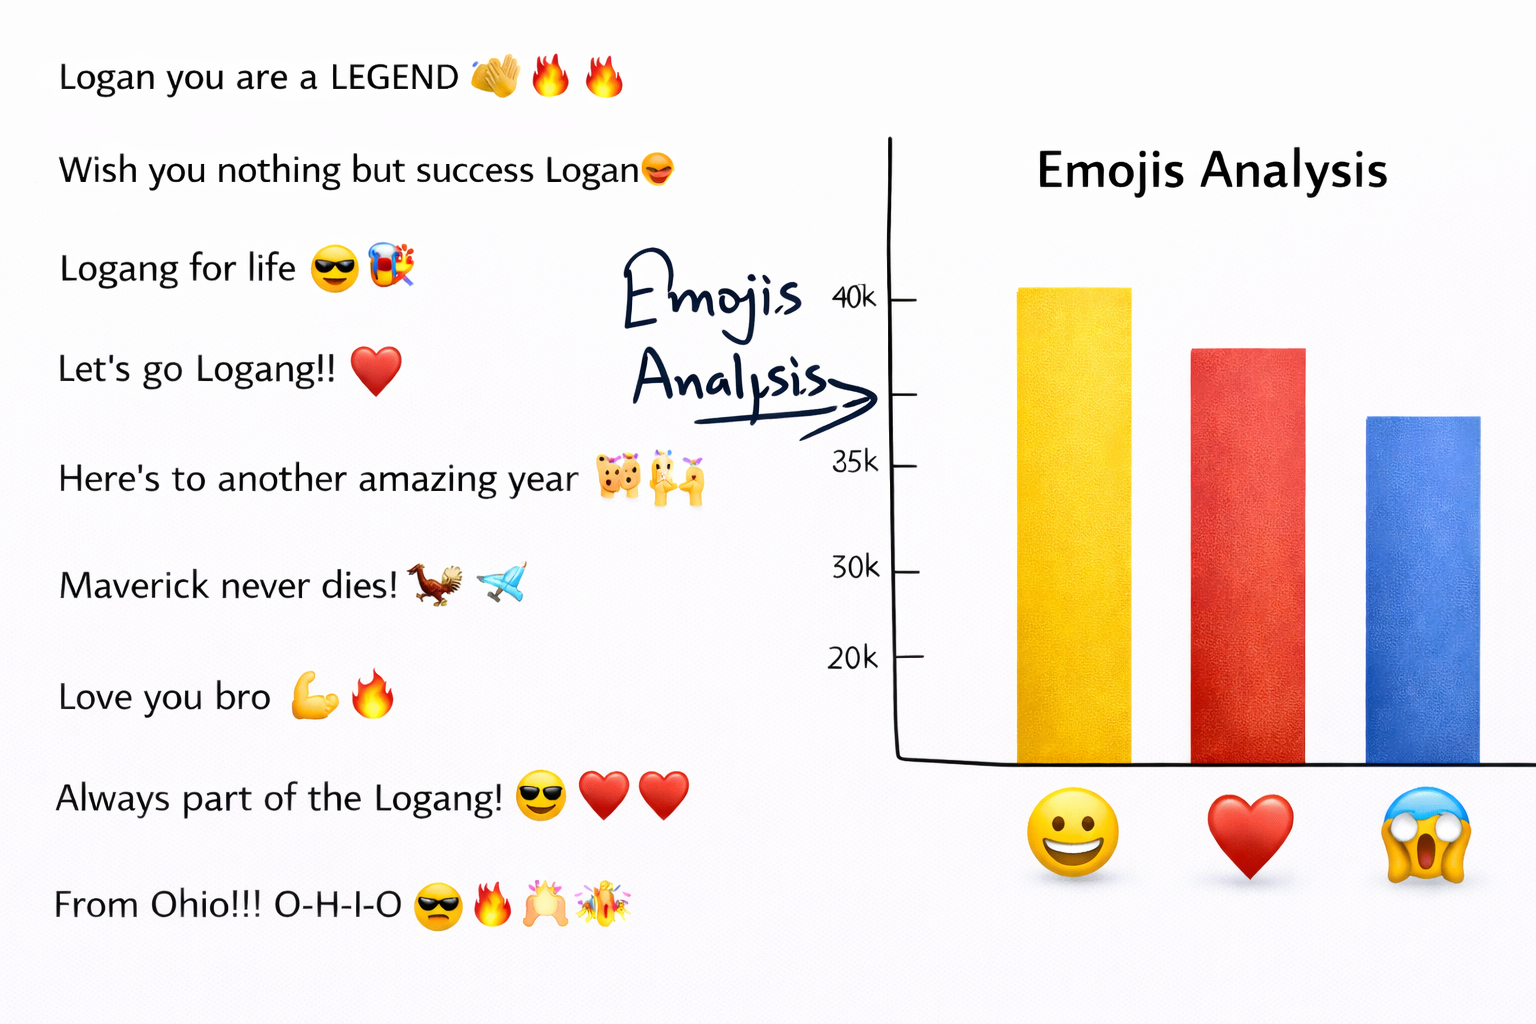

# 3.. Perform Emoji's Analysis

In [ ]:
'''

Hi there , in the last session , we have shed light on sentimen analysis

Now in this session , lets talk about emojis aalysis


Coming to life cycle of dta analytics , we are actually Trying to do data analysis to make insigst from fata 



'''

In [ ]:
'''

Show img :


we have roughly around 400K comment text so it is impractical to undertand user emotions for such huge text data ,
So To simplify , we extract emojis from comments, bcz emojis act as direct emotion signals..


Moment u see this plot : 
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..



'''

In [310]:
# !pip install emoji==2.15.0 ## .15.0 is a most stable version till date , hence installing this version makes sense !

In [24]:
import emoji

In [185]:
comments['comment_text'].head(25)

0                     Logan Paul it's yo big day ‼️‼️‼️
1     I've been following you from the start of your...
2                    Say hi to Kong and maverick for me
3                                   MY FAN . attendance
4                                            trending 😉
5                               #1 on trending AYYEEEEE
6                                  The end though 😭👍🏻❤️
7                                  #1 trending!!!!!!!!!
8                           Happy one year vlogaversary
9     You and your shit brother may have single hand...
10               There should be a mini Logan Paul too!
11    Dear Logan, I really wanna get your Merch but ...
12    Honestly Evan is so annoying. Like its not fun...
13                     Casey is still better then logan
14        aw geez rick this guy is the face of YouTube.
15                         He happy cause he in a movie
16    Ayyyyoooo Logang what up .  This was a hard vl...
17    Bro y didnt u give merch to johannes he is

In [ ]:
### lets extract emoji from below comment !

In [22]:
comment = 'trending 😉'

In [ ]:
emoji.EMOJI_DATA ## dictionary of ALL emojis defined in emoji lib

In [26]:
emoji_list = []

for char in comment :
    if char in emoji.EMOJI_DATA :
        emoji_list.append(char)

In [27]:
emoji_list

['😉']

In [ ]:
'''

Now u have to extract emojis from all the rows of "comment_text" col..

'''

In [28]:


all_emojis_list = []

for comment in comments['comment_text'].dropna() : ## in case any missing value is left in "comment_text" , call dropna()
    for char in comment :
        if char in emoji.EMOJI_DATA :
            all_emojis_list.append(char)

In [29]:
all_emojis_list[0 : 10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [30]:
len(all_emojis_list) ## all emojis 

213868

In [ ]:
### Now , we have to compute frequencies of each & every emoji in "all_emojis_list" to create such a barplot..

In [31]:
from collections import Counter

In [32]:
emojis_count_list = Counter(all_emojis_list).most_common(10) ## new method !

In [33]:
emojis_count_list

[('😂', 27287),
 ('❤', 22180),
 ('😍', 22145),
 ('🔥', 6288),
 ('😭', 6155),
 ('💖', 4242),
 ('😘', 4174),
 ('👏', 4005),
 ('👍', 3789),
 ('💕', 3731)]

In [36]:
emojis = [emoji for emoji, count in emojis_count_list]
counts = [count for emoji, count in emojis_count_list]

In [37]:
emojis

['😂', '❤', '😍', '🔥', '😭', '💖', '😘', '👏', '👍', '💕']

In [38]:
counts

[27287, 22180, 22145, 6288, 6155, 4242, 4174, 4005, 3789, 3731]

In [39]:
import plotly.express as px

In [40]:
emojis = px.bar(
    x = emojis,
    y = counts,
    title = "Most Used Emojis in YouTube Comments",
    labels = 
    {
        "x" : "Emoji",
        "y" : "Count"
    }
)


In [ ]:
emojis.show()

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

In [ ]:
'''

The majority of customers appear to be happy and satisfied, 
as their frequent use of emojis representing :
humor (😂), 
love and admiration (😍, ❤️, 💖), 
excitement (🔥)

and positive emotions


'''

# 4.. Collect Entire data of Youtube !

In [ ]:
'''

Hi there , So far, we’ve analyzed YouTube comments from US users, focusing on emoji analysis and sentiment analysis.

So lets collect more Youtube data to understand how users are interacting of other countries like Germany , Canada , Mexico, india , 

So that we will understand : 
    How YouTube videos go viral globally
    How the YouTube algorithm reacts to different audiences !
    What matters more for a successful Youtube video ( Views / Engagement )
    
    
It means we are again diving into data collection & will do data cleaning again & then we will do data analysis to make insights !    

'''

In [49]:
import os

## lets mport os packge to interact with our operating system as we have all the data in our operating system !

In [50]:
files= os.listdir(r'R:\All_Datasets\1.. Youtube\Datasets\additional_data')

In [51]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [ ]:
'''
from above files , we have all the country based in respective csv files 
data in csv files :

like we have :

US users -> 'USvideos.csv'
Canada users -> 'CAvideos.csv'
Denmark Uers -> 'DEvideos.csv'

'''

In [52]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]

In [53]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [65]:
## lets import warnings to get rid of any kind of warnings while collecting data !

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [58]:
full_df = pd.DataFrame()
path = r'R:\All_Datasets\1.. Youtube\Datasets\additional_data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding = 'iso-8859-1' , on_bad_lines = "skip")
    full_df = pd.concat([full_df , current_df] , ignore_index = True)

In [ ]:
'''

we need to collect countries data into 1 dataframe so we have to concatenate multiple dataframes.

Concatenation works like that :

show image 


'''

In [150]:
full_df.shape

(375942, 16)

In [151]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...

In [152]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

# 5.. How to export your data into (csv, json, db)

In [ ]:
'''

In the last seesion , we have learnt how to collect data !
Now , lets export this data into various formats for further analysis :


    a) csv 
    b) json
    c) db


Why ?


'''

In [ ]:
'''

Bcz In the real world, data is stored in different formats based on its size, usage, and scale.
As data analysts, it’s important to export data in the right format for efficient analysis and storage.

If your data in small size , u can store data into csv/excel !
If medium size -> json / databses
If huge scale data -> Big data Systems like (HDFS, Cloud Storage

This is the most common Industry standards !

'''

In [ ]:
'''

But the moment we collect data , we will have raw , uncleaned data !
So very first we have to make it clean ! 


'''

In [153]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [60]:
full_df = full_df.drop_duplicates() ## lets drop duplicate rows ..

In [61]:
full_df.shape

(339525, 16)

#### a... Storing data into csv ..

In [ ]:
full_df.to_csv(r'G:\Data Science projects\EDA_Projects\Youtube\All_formats_data/Youtube_whole_data.csv' , index=False)

### as its a huge real world data , it takes times 


### you can consider sample of data depending on how efficient your system is..
full_df[0:5000].to_csv(r'R:\All_Datasets\1.. Youtube\exporting_data/youtube_sample.csv' , index = False)

#### b... Storing data into json

In [84]:
full_df[0:1000].to_json(r'Z:\1.. Youtube\export_data/youtube_sample.json')

### as its a huge real world data , it takes times 

In [156]:
full_df.head(1)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...

In [ ]:
'''

Json in short is all about collection of key-pairs !
Keys = column names
Values = row values


if orient = 'records' , 
Take each row of your DataFrame & Turn it into a dictionary where :

Keys = column names
Values = row values

Then wrap all those dictionaries in a list , ie



[
  {
    "video_id": "n1WpP7iowLc",
    "trending_date": "17.14.11",
    "title": "Eminem - Walk On Water (Audio) ft. Beyoncé",
    "channel_title": "EminemVEVO",
    "category_id": 10,
    "publish_time": "2017-11-10T17:00:03.000Z",
    "tags": "Eminem|Walk|On|Water|Aftermath..."
  },
  {
    "video_id": "0dBIkQ4Mz1M",
    "trending_date": "17.14.11",
    "title": "PLUSH - Bad Unboxing Fan Mail",
    "channel_title": "iDubbbzTV",
    "category_id": 23,
    "publish_time": "2017-11-13T17:00:00.000Z",
    "tags": "plush|bad unboxing|unboxing|fan mail|id..."
  }
]

'''

#### c... Storing data into database

In [ ]:
'''

What is Database ?
Database is that place or file structure where information is stored in a proper structure !

Databases are broadly classified into Relational dbs & non-relational dbs !

Relational Dbs : data is stored in tables or (rows , cols) [table centric]
                You can use Uses SQL to fetch data from relational or sql dbs
                
non-relational dbs : data is stored in the form of documents ( document centric)
                nosql dbs


'''

In [ ]:
'''

1 ) very first u have to create Engine to your database.. or connection to your db using create_engine()
    so that we can insert all data..
    
2 ) Then u have to insert data into your table of your db ( Insert data using to_sql())
    Insert relational db , we have a table & inside table , all data is stored 

'''

In [ ]:
!pip install sqlalchemy

In [129]:
# create engine allows us to connect to database !
from sqlalchemy import create_engine

In [137]:
# ie I want to create a connection with "youtube_data.sqlite" file which is of "sqlite" database 

engine = create_engine(r'sqlite:///R:\All_Datasets\1.. Youtube\export_data/youtube_data.sqlite')

## Format of connection string is : sqlite:///file_path/file.db
## for other databases , we have diff diff formats for oracle , postgresql



In [140]:
### if_exists='replace' = “If the table already exists, drop it completely and create a new one with the new data.”

full_df.to_sql('Users' , con = engine , if_exists='replace')

100

In [ ]:
## As soon as u have u have your data into 'youtube_whole_data.sqlite' 
## which has table has 'Users' , now u can read data from this db file 
## 'youtube_data.sqlite' using sqlite3 & pandas



In [ ]:
'''

so in this session , we have learnt about how to store data so that we will use this data for further Analysis

Momentum : 
Now in the next session ,  
we will analyse which is the most trending category at Youtube !

Show plot : 
    Moment u see this area chart , u can have a clear answer that Music category is a big player 

'''

# 6.. How do views accumulate across categories over time?
    How YouTube Views Shift Over Time
    YouTube View Wars : Which Categories Rule Trending Over Time ?
    Trending Momentum Over Time
    Which category dominates most days
    Which categories rise or fall over time
    

In [ ]:
'''

In the last session , we have learnt about how to store data !
In this session , lets analyse "How YouTube Views Shift Over Time"

It means , we are actually EDA !

In simple terms, we want to see:
    Which categories dominate attention

all we need is such plot :
    on x-axis we have trending dates !
    on y-axis we have total views !
    Each color: A YouTube category

& this plot will tell us "Music consistently leads overall attention , but its dominance fluctuates with time..""



“Each color shows how much attention a category gets each day.
The thicker the area, the more dominant the category.”






To create such plot , we need such data !
Its a pivot table , where 
    On indexes , we want "trending_date",
    on columns , we want "category_name",
    call values must  be filled "views"


'''

In [ ]:
## we have to make sure that data-type of trending_date must be correct , it means "date-time.."

In [62]:
full_df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [63]:
full_df["trending_date"]

0         17.14.11
1         17.14.11
2         17.14.11
3         17.14.11
4         17.14.11
            ...   
375936    18.14.06
375938    18.14.06
375939    18.14.06
375940    18.14.06
375941    18.14.06
Name: trending_date, Length: 339525, dtype: object

In [66]:
full_df['trending_date'] = pd.to_datetime(full_df['trending_date'] , format='%y.%d.%m')

In [67]:
full_df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [ ]:
### u will observe that u do not have "category_name" column here  , u have only category_id col..
### It means first u have to extract "category_name 

## Actually , we have "category name" along with their "category id" inside JSON files !
## so very first we have to load that json file !

In [68]:
import json

path = r'R:\All_Datasets\1.. Youtube\Datasets\additional_data\US_category_id.json'

with open(path, 'r', encoding='utf-8') as f:
    data = json.load(f)


In [ ]:
data

In [162]:
data['items'][1] ## access 1st key !

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [70]:
data['items'][1]['snippet']['title'] ## this will give u category_name for 

'Autos & Vehicles'

In [72]:
data['items'][1]['id'] ## this will give u category_id !

'2'

In [ ]:
'''

All we want is such dictionary , which we can map in on top of our dataframe !


Show img 

'''

In [75]:
cat_dict = {}

for item in data["items"]:
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item["id"])] = item['snippet']['title']

In [77]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [78]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [79]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc    2017-11-14  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M    2017-11-14                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...         Music  
1  STill got a lot of packages. Probably will las...        Comedy

In [ ]:
'''

First I will group all the rows of "trending_date" , then group rows of "category_name" & then compute total views 
    in every group...(call sum)

Then unstack or reshape data into a pivot format..


'''

In [81]:
pivot_df = full_df.groupby(["trending_date", "category_name"])["views"].sum().unstack(fill_value = 0)

## unstack or reshape data into a pivot format..

In [169]:
## (Required for Stacked Area)

In [82]:
pivot_df

category_name  Autos & Vehicles     Comedy  Education  Entertainment  \
trending_date                                                          
2017-11-14              5449767   92798793    8625525      233134424   
2017-11-15              8050486   89048129    7072457      200761218   
2017-11-16              7358437   82066922    7296205      215075485   
2017-11-17              6436997   81766773    9328728      231929119   
2017-11-18              7098844   80400958    8837341      217196554   
...                         ...        ...        ...            ...   
2018-06-10              3419469   92834235    7405034      541526503   
2018-06-11              4911969   93551035   10338600      505373442   
2018-06-12              5126438  109037786    9841181      482032248   
2018-06-13              4469006  107950851   10708135      447856067   
2018-06-14              3764484  111343379   11804673      423333697   

category_name  Film & Animation     Gaming  Howto & Style  Movies       Music  \
trending_date                                                                   
2017-11-14             59824388   20788680       39692396       0   522096451   
2017-11-15             73620337   18302875       47173790       0   363498984   
2017-11-16             78182533   18411174       36334035       0   336201790   
2017-11-17             50794195   10147876       34707221       0   357949721   
2017-11-18             64075205   10738066       29769264       0   369823307   
...                         ...        ...            ...     ...         ...   
2018-06-10            120104266   70525231       63597826       0  1388065416   
2018-06-11            119098102   74941508       62355833       0  1297630273   
2018-06-12            135940594  108525939       54252824       0   943951258   
2018-06-13            144981419  103111185       49917693       0   949586070   
2018-06-14            170653438  113105423       51352011       0   949001689   

category_name  News & Politics  Nonprofits & Activism  People & Blogs  \
trending_date                                                           
2017-11-14            22893805                1397585        69741490   
2017-11-15            19512569                5363406        68342887   
2017-11-16            21519797                4584043        47542853   
2017-11-17            25304189                1377828        48916714   
2017-11-18            26600320                2859005        45943293   
...                        ...                    ...             ...   
2018-06-10            50320845                2267573       156067902   
2018-06-11            32512659                2739846       126699590   
2018-06-12            35845162                3237080       128605502   
2018-06-13            34288760                1630726       129823608   
2018-06-14            37280298                2348339       129867951   

category_name  Pets & Animals  Science & Technology    Shows    Sports  \
trending_date                                                            
2017-11-14            3427634              19628265  1689318  34161599   
2017-11-15            1684139              44572576  2456621  40823955   
2017-11-16            2609618              39281789  1019265  46353999   
2017-11-17            2068139              48763394  2433230  41649023   
2017-11-18            4302877              77863217  3520947  33424799   
...                       ...                   ...      ...       ...   
2018-06-10           16377474              38192009  1764569  71436390   
2018-06-11           17112106              38183326  2122065  77764246   
2018-06-12           15477174              30930795  2436709  57287168   
2018-06-13           14634380              25378821  3238945  55961894   
2018-06-14           16508451              19655174  2986906  58612762   

category_name  Trailers  Travel & Events  
trending_date                             
2017-11-14

In [ ]:
## Plot Stacked Area Chart

In [120]:
pivot_df.index

DatetimeIndex(['2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17',
               '2017-11-18', '2017-11-19', '2017-11-20', '2017-11-21',
               '2017-11-22', '2017-11-23',
               ...
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=205, freq=None)

In [122]:
area_chart = px.area(
    data_frame = pivot_df,
    x = pivot_df.index,
    y = pivot_df.columns,## provide unique color to catgeories 
    title="Trending Momentum Over Time by Category"
)

area_chart = fig.update_layout( ## update layout of plot 
    xaxis_title="Trending Date",
    yaxis_title="Total Views",
    hovermode="x unified" ## show all the results 
)



In [ ]:
area_chart.show()

In [ ]:
'''


🧠 How to Explain to Students (Say This 👇)

“Each color shows how much attention a category gets each day.
The thicker the area, the more dominant the category.”


'''

In [ ]:
## when I hover , as we have lot of categories , so lets consider top 5 -8 most Viewed categories !

In [92]:
top_categories = full_df.groupby("category_name")["views"].sum().nlargest(6).index

In [95]:
top_categories

Index(['Music', 'Entertainment', 'Film & Animation', 'People & Blogs',
       'Comedy', 'Sports'],
      dtype='object', name='category_name')

In [111]:
filtered_df = pivot_df[top_categories]

In [124]:
fig_area = px.area(
    filtered_df,
    x = filtered_df.index,
    y = filtered_df.columns ,
    title="Top 6 Categories – Trending Momentum"
)

fig_area = fig_area.update_layout(
    xaxis_title="Trending Date",
    yaxis_title="Total Views",
    hovermode="x unified"
)

In [ ]:
fig_area.show()

In [ ]:
'''

Music consistently leads overall attention , but its dominance fluctuates with time..
Entertainment and Sports drive short-term spikes, reflecting event-based interest
Trending momentum shifts across categories, showing that YouTube trends are dynamic, not static


'''

# 7.. Do Viral Videos Actually Get Engagement?
    “Views vs Engagement: What’s the Real Win?”
        OR
    Engagement Bubble Map ?
        OR
    Which videos generate maximum engagement per view?

In [ ]:
'''
First show plot

📌 What Does This Plot Show?

On x-axis : we need "views" (reach / popularity)
On y-axis : we need "engagement_rate"

Size of bubble will be decided by "comment_count"
Higher comment count basically means , bubble will be bigger in size 


Lets make insights from this plot 




🔍 1. Engagement DROPS as Views Grow (Clear Pattern)
🔥 2. Hidden Gems Are Now Visible ( these videos have smaller reach , but highly loyal audiences)
    3. Music Category Dominates Views — But Not Engagement
        As music videos have 100M + views , but only 1-10%% engagement 


'''

In [ ]:
full_df.columns

## but u dont have engagement_rate col , so lets create this column..

In [ ]:
## “Out of the people who watched the video, how many actually interacted(likes + comment_count) with it ?”
## 0.01 (1%) , ie 1 out of 100 viewers engaged !

In [127]:
full_df['engagement_rate'] = (full_df['likes'] + full_df['comment_count']) / full_df['views']

In [177]:
import plotly.express as px

fig = px.scatter(
    full_df,
    x="views",
    y="engagement_rate",
    size="comment_count",
    color="category_name",
    hover_name="title",
    title="🟢 Engagement Bubble Map: Views vs Engagement Rate",
    size_max=60
)

fig = fig.update_layout(
    xaxis_title="Views",
    yaxis_title="Engagement Rate",
    hovermode="closest"
)


In [64]:
# fig.show()

In [ ]:
'''

Your bubble chart has:

Views ranging from thousands → hundreds of millions
Engagement rate mostly between 0 and 1

That’s a massive scale imbalance..

## use Log Scale for Cleaner View



❌ Without Log Scale (Linear X-axis)
What happens?

High-view videos (100M–400M) dominate the plot
Low/medium view videos get squeezed into a vertical line
You lose patterns in smaller creators/videos

'''

In [131]:
full_df.shape

(339525, 18)

In [ ]:
'''
Data is quite huge for creating bubble plot , as u will plotting almsot 330K bubbles  , 
So lets consider some sample of data 

'''

In [132]:
bubble_sample = full_df.sample(50000)

In [133]:
import plotly.express as px

bubble = px.scatter(
    bubble_sample,
    x="views",
    y="engagement_rate",
    size="comment_count",
    color="category_name",
    hover_name="title",
    title="🟢 Engagement Bubble Map: Views vs Engagement Rate",
    size_max=60
)

bubble = fig_bubble.update_layout(
    xaxis_title="Views",
    yaxis_title="Engagement Rate",
    hovermode="closest"
)


In [135]:
bubble = bubble.update_xaxes(type = "log")
# bubble.show()

In [ ]:
'''

🧠 Insights :

On x-axis , we have views
On y-axis , we have engagement_rate


🔍 1. Engagement DROPS as Views Grow (Clear Pattern)
    Strong visible trend :

    Videos with low–medium views → high engagement
    Videos with very high views → low engagement

    📌 Insight:

    Virality increases reach, not intimacy.
    
    
    
    
    
    🔥 2. Hidden Gems Are Now Visible 

    Look at the upper-left area:

    Views: 10K – 1M
    Engagement Rate: 0.4 – 0.9

    These videos:

    Have smaller reach
    But extremely loyal audiences

    🎯 Business takeaway:
    These are promotion-worthy videos for growth campaigns..
    
    
    
    
    🎵 3. Music Category Dominates Views — But Not Engagement

    From the plot:

    Music videos cluster on the far right
    Engagement rates mostly < 0.1
    Example shown:

    
    
    
    
    🔬 4. Science & Technology / Education Punch Above Their Weight

    Green & yellow bubbles:

    Moderate views
    High engagement (0.3–0.8)
    Large bubble sizes (comments)

    💡 Insight:
    Informational content builds discussion, not just views..
    
    
    
    “Log scale doesn’t change the data — it reveals reality..”
    Log Scale Reveals TRUE Structure of YouTube Ecosystem
    
    
    
    So here is task for you : 
    
    Ask:
    “If you were Senior Manger at youtube , which videos would you boost — high views or high engagement?”
    Drop your Ideas in QnA & we would love to interat with that !


'''

# 🌳 8.. Views vs Engagement : Inside YouTube’s Algorithm !
         Which categories consume the most viewer attention ? 
         
         OR 
         
         Where does YouTube attention REALLY go

In [ ]:
'''

In order to find solution of this task , u need such effective plot ( treemap )


Size of rectangle represents a category = Total Views (Attention Volume)
    Bigger the rectangle = more total viewer attention.. ”
    
Color of treemap = Engagement Efficiency (Attention Quality)
    Green colour = more engagement category 


Bcz : 
Views tell us where attention goes.
Engagement efficiency tells us where VALUE is created..


Lets make insights from this plot : 

🟢 1. Music = Massive Attention + Strong Engagement
    (Large + Dark Green)
    Huge total views (dominates the platform)
    Good engagement efficiency (~0.05)
    
🟢 2. Comedy = Smaller than Music, but HIGH Engagement
    (Medium + Dark Green)

    Not the biggest in views
    One of the highest engagement efficiencies




Larger blocks represent higher attention volume
Music and Entertainment dominate total views
Music, Comedy, and How-to & Style show strong engagement quality




To create such plot , u need such data :

show img 


'''

In [180]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'engagement_rate'],
      dtype='object')

In [ ]:
'''

First I will group all the rows of every category & then compute :

    total views in every category...(call "sum" on "views" & store results into total_views column..)
    avg engagement rate ( so call "mean" on "engagement_rate")
    total videos uploaded (call "count" on "video_id")

Then call reset_index() to convert it into data-frame !


'''

In [139]:
category_metrics = (
    full_df
    .groupby("category_name")
    .agg(
        total_views=("views", "sum"),
        avg_engagement_efficiency = ("engagement_rate", "mean"),
        video_count = ("video_id", "count")
    )
    .reset_index()
)

In [140]:
category_metrics

category_name   total_views  avg_engagement_efficiency  \
0        Autos & Vehicles    1514202384                   0.049873   
1                  Comedy   18341009925                   0.058413   
2               Education    2485052061                   0.057669   
3           Entertainment   85162066718                   0.036217   
4        Film & Animation   20397383805                   0.033448   
5                  Gaming    6216418800                   0.057708   
6           Howto & Style    8271658225                   0.062121   
7                  Movies      33047793                   0.016044   
8                   Music  220389615568                   0.051929   
9         News & Politics    8817653917                   0.028820   
10  Nonprofits & Activism    1091293307                   0.049619   
11         People & Blogs   19178440262                   0.041417   
12         Pets & Animals    1668803655                   0.050707   
13   Science & Technology    6986113196                   0.058860   
14                  Shows     299255746                   0.015950   
15                 Sports   15038121013                   0.025247   
16               Trailers         55043                   0.006359   
17        Travel & Events     666409907                   0.045976   

    video_count  
0          4596  
1         24024  
2          7396  
3         97365  
4         18329  
5         10433  
6         17549  
7            22  
8         36990  
9         34599  
10         2722  
11        50164  
12         4215  
13         7350  
14          726  
15        21409  
16            5  
17         1631

In [142]:
import plotly.express as px

treemap = px.treemap(
    category_metrics,
    path=["category_name"],
    values="total_views",                       # SIZE → Attention volume
    color="avg_engagement_efficiency",           # COLOR → Attention quality
    color_continuous_scale="RdYlGn",
    title="🌳 Category Attention Share with Engagement Efficiency Overlay",
    hover_data={
        "total_views": ":,.0f",
        "avg_engagement_efficiency": ":.3f",
        "video_count": True
    }
)

treemap = treemap.update_layout(
    coloraxis_colorbar=dict(
        title="Engagement Efficiency"
    )
)



In [ ]:
treemap.show()

In [ ]:
'''


Which categories should YouTube PROMOTE vs just HOST? 


Because it combines:

Size = Total Views (Attention Volume)
Color = Engagement Efficiency (Attention Quality)



🟢 1. Music = Massive Attention + Strong Engagement
(Large box + Dark Green)
Huge total views (dominates the platform)
Good engagement efficiency (~0.05)

👉 Interpretation
Music is YouTube’s traffic engine AND still reasonably engaging..




🟢 2. Comedy = Smaller than Music, but HIGH Engagement
(Medium + Dark Green)

Not the biggest in views
One of the highest engagement efficiencies

👉 Interpretation
Comedy viewers are more expressive and interactive.



🟢 3. Science & Technology / Education = “Hidden Gems”
(Small + Dark Green)

Relatively small view share
Very high engagement efficiency

👉 Interpretation
Niche content with loyal, thoughtful audiences..






'''

# 9.. Is the audience actually engaged ?


In [ ]:
'''

First show table data , 
then say we will learn every metric !


Then we will convert such data into boxplot !
bcz this plot shows all these metrics !

'''

In [183]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'engagement_rate'],
      dtype='object')

In [74]:
full_df["engagement_rate"].describe()

count    339525.000000
mean          0.042103
std           0.043971
min           0.000000
25%           0.010395
50%           0.027453
75%           0.060261
max           0.957256
Name: engagement_rate, dtype: float64

In [ ]:
'''

Mean (0.042): On average, videos convert about 4.2% of views into interactions (likes + comments)..
25% (0.010): A quarter of videos have very low engagement (<1%),
50% / Median (0.027): 50% of the videos achieve ~2.7% engagement

75% (0.060): 25% of the videos reach 6%+ engagement
Max (0.958): A few highly viral videos achieve near-perfect engagement , ie 95% of engagement 

'''


## now lets find similar numbers for every category !

In [145]:
category_engagement_stats = (
    full_df
    .groupby("category_name")["engagement_rate"]
    .describe()
)

category_engagement_stats

count      mean       std       min       25%  \
category_name                                                            
Autos & Vehicles        4596.0  0.049873  0.035542  0.000000  0.024870   
Comedy                 24024.0  0.058413  0.046692  0.000000  0.022036   
Education               7396.0  0.057669  0.042375  0.000000  0.028697   
Entertainment          97365.0  0.036217  0.041318  0.000000  0.008234   
Film & Animation       18329.0  0.033448  0.039422  0.000000  0.007860   
Gaming                 10433.0  0.057708  0.048587  0.000000  0.022935   
Howto & Style          17549.0  0.062121  0.042688  0.000000  0.032948   
Movies                    22.0  0.016044  0.008651  0.006137  0.010416   
Music                  36990.0  0.051929  0.045435  0.000000  0.021012   
News & Politics        34599.0  0.028820  0.035024  0.000000  0.007265   
Nonprofits & Activism   2722.0  0.049619  0.058793  0.000000  0.009192   
People & Blogs         50164.0  0.041417  0.047553  0.000000  0.007981   
Pets & Animals          4215.0  0.050707  0.039806  0.000000  0.023875   
Science & Technology    7350.0  0.058860  0.053710  0.000000  0.024923   
Shows                    726.0  0.015950  0.023309  0.001890  0.005640   
Sports                 21409.0  0.025247  0.029727  0.000000  0.006944   
Trailers                   5.0  0.006359  0.008553  0.000000  0.000202   
Travel & Events         1631.0  0.045976  0.044391  0.000000  0.015286   

                            50%       75%       max  
category_name                                        
Autos & Vehicles       0.045179  0.068422  0.234820  
Comedy                 0.048903  0.082108  0.746056  
Education              0.050298  0.077079  0.445312  
Entertainment          0.020743  0.050060  0.957256  
Film & Animation       0.018801  0.044200  0.521491  
Gaming                 0.048472  0.078039  0.863608  
Howto & Style          0.052991  0.082680  0.709778  
Movies                 0.014400  0.018396  0.043338  
Music                  0.038634  0.067957  0.506464  
News & Politics        0.014439  0.038293  0.409788  
Nonprofits & Activism  0.023070  0.074042  0.704366  
People & Blogs         0.022516  0.060376  0.879734  
Pets & Animals         0.040444  0.066759  0.330806  
Science & Technology   0.047330  0.077522  0.774282  
Shows                  0.007165  0.017889  0.183468  
Sports                 0.013400  0.031037  0.305641  
Trailers               0.000297  0.014076  0.017219  
Travel & Events        0.034595  0.060088  0.576667

In [146]:
category_engagement_stats.sort_values("mean", ascending=False)

count      mean       std       min       25%  \
category_name                                                            
Howto & Style          17549.0  0.062121  0.042688  0.000000  0.032948   
Science & Technology    7350.0  0.058860  0.053710  0.000000  0.024923   
Comedy                 24024.0  0.058413  0.046692  0.000000  0.022036   
Gaming                 10433.0  0.057708  0.048587  0.000000  0.022935   
Education               7396.0  0.057669  0.042375  0.000000  0.028697   
Music                  36990.0  0.051929  0.045435  0.000000  0.021012   
Pets & Animals          4215.0  0.050707  0.039806  0.000000  0.023875   
Autos & Vehicles        4596.0  0.049873  0.035542  0.000000  0.024870   
Nonprofits & Activism   2722.0  0.049619  0.058793  0.000000  0.009192   
Travel & Events         1631.0  0.045976  0.044391  0.000000  0.015286   
People & Blogs         50164.0  0.041417  0.047553  0.000000  0.007981   
Entertainment          97365.0  0.036217  0.041318  0.000000  0.008234   
Film & Animation       18329.0  0.033448  0.039422  0.000000  0.007860   
News & Politics        34599.0  0.028820  0.035024  0.000000  0.007265   
Sports                 21409.0  0.025247  0.029727  0.000000  0.006944   
Movies                    22.0  0.016044  0.008651  0.006137  0.010416   
Shows                    726.0  0.015950  0.023309  0.001890  0.005640   
Trailers                   5.0  0.006359  0.008553  0.000000  0.000202   

                            50%       75%       max  
category_name                                        
Howto & Style          0.052991  0.082680  0.709778  
Science & Technology   0.047330  0.077522  0.774282  
Comedy                 0.048903  0.082108  0.746056  
Gaming                 0.048472  0.078039  0.863608  
Education              0.050298  0.077079  0.445312  
Music                  0.038634  0.067957  0.506464  
Pets & Animals         0.040444  0.066759  0.330806  
Autos & Vehicles       0.045179  0.068422  0.234820  
Nonprofits & Activism  0.023070  0.074042  0.704366  
Travel & Events        0.034595  0.060088  0.576667  
People & Blogs         0.022516  0.060376  0.879734  
Entertainment          0.020743  0.050060  0.957256  
Film & Animation       0.018801  0.044200  0.521491  
News & Politics        0.014439  0.038293  0.409788  
Sports                 0.013400  0.031037  0.305641  
Movies                 0.014400  0.018396  0.043338  
Shows                  0.007165  0.017889  0.183468  
Trailers               0.000297  0.014076  0.017219

In [ ]:
'''

🧠 Insight

How-to, Science & Technology, and Comedy show the highest median engagement, indicating consistently active audiences
Entertainment and People & Blogs have very wide engagement spread, reflecting hit-or-miss, volume-driven content

Music dominates in scale but not in engagement efficiency, showing strong reach with moderate interaction
News, Sports, and Film & Animation have low median engagement, suggesting more passive consumption


'''

In [ ]:
'''

If u want to viz this data , u can use boxplot 
which tells 25%(Q1)  , 50th percentile(Q2) , 75th percentile(Q3)  ,  
BOX holds = [Q3 - Q1], ie it holds 50% of data 

'''

In [147]:
import plotly.express as px

box = px.box(
    full_df,
    x="category_name",
    y="engagement_rate",
    color="category_name",
    title="📊 Audience Engagement by Category"
)

In [151]:
# box